# Covariance

https://www.investopedia.com/articles/financial-theory/11/calculating-covariance.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol1 = '^NSEI'
symbol2 = 'TCS.NS'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df1 = yf.download(symbol1,start,end)
df2 = yf.download(symbol2,start,end)

# View Columns
df1.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
2020-01-02 00:00:00+05:30,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2020-01-03 00:00:00+05:30,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
2020-01-06 00:00:00+05:30,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
2020-01-07 00:00:00+05:30,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


In [3]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,2168.000000,2183.899902,2154.000000,2167.600098,2034.032349,1354908
2020-01-02 00:00:00+05:30,2179.949951,2179.949951,2149.199951,2157.649902,2024.695801,2380752
2020-01-03 00:00:00+05:30,2164.000000,2223.000000,2164.000000,2200.649902,2065.046143,4655761
2020-01-06 00:00:00+05:30,2205.000000,2225.949951,2187.899902,2200.449951,2064.857910,3023209
2020-01-07 00:00:00+05:30,2200.500000,2214.649902,2183.800049,2205.850098,2069.925537,2429317


In [4]:
c = df1['Adj Close'].cov(df2['Adj Close'])

In [5]:
c

1624427.483125986

In [6]:
df = pd.concat([df1['Adj Close'], df2['Adj Close']],axis=1)

In [7]:
df.head()

,Adj Close,Adj Close
Date,,
2020-01-01 00:00:00+05:30,12182.500000,2034.032349
2020-01-02 00:00:00+05:30,12282.200195,2024.695801
2020-01-03 00:00:00+05:30,12226.650391,2065.046143
2020-01-06 00:00:00+05:30,11993.049805,2064.857910
2020-01-07 00:00:00+05:30,12052.950195,2069.925537


In [8]:
# Rename columns
df.columns = [symbol1,symbol2]

In [9]:
df.head()

,^NSEI,TCS.NS
Date,,
2020-01-01 00:00:00+05:30,12182.500000,2034.032349
2020-01-02 00:00:00+05:30,12282.200195,2024.695801
2020-01-03 00:00:00+05:30,12226.650391,2065.046143
2020-01-06 00:00:00+05:30,11993.049805,2064.857910
2020-01-07 00:00:00+05:30,12052.950195,2069.925537


In [10]:
n = 14
df['Cov'] = df['^NSEI'].rolling(n).cov(df['TCS.NS'])

In [11]:
df.head(20)

,^NSEI,TCS.NS,Cov
Date,,,
2020-01-01 00:00:00+05:30,12182.500000,2034.032349,NaN
2020-01-02 00:00:00+05:30,12282.200195,2024.695801,NaN
2020-01-03 00:00:00+05:30,12226.650391,2065.046143,NaN
2020-01-06 00:00:00+05:30,11993.049805,2064.857910,NaN
2020-01-07 00:00:00+05:30,12052.950195,2069.925537,NaN
2020-01-08 00:00:00+05:30,12025.349609,2116.281006,NaN
2020-01-09 00:00:00+05:30,12215.900391,2077.901611,NaN
2020-01-10 00:00:00+05:30,12256.799805,2077.150879,NaN
2020-01-13 00:00:00+05:30,12329.549805,2055.380859,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Date')

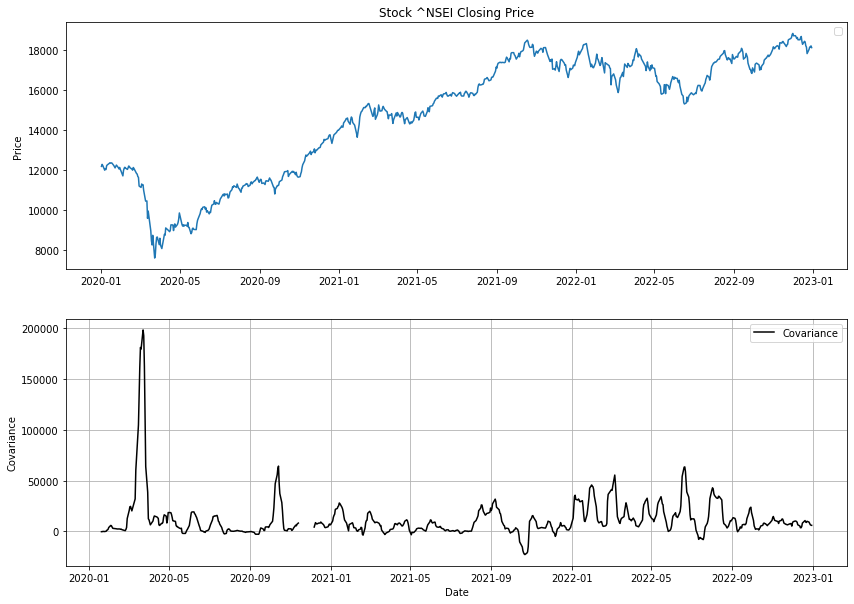

In [12]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df1['Adj Close'])
ax1.set_title('Stock '+ symbol1 +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Cov'], label='Covariance', color='black')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Covariance')
ax2.set_xlabel('Date')

## Candlestick with Covariance

In [13]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df1.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,18261.770833,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100,False
1,18262.770833,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700,True
2,18263.770833,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800,False
3,18266.770833,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500,False
4,18267.770833,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800,False


Text(0.5, 0, 'Date')

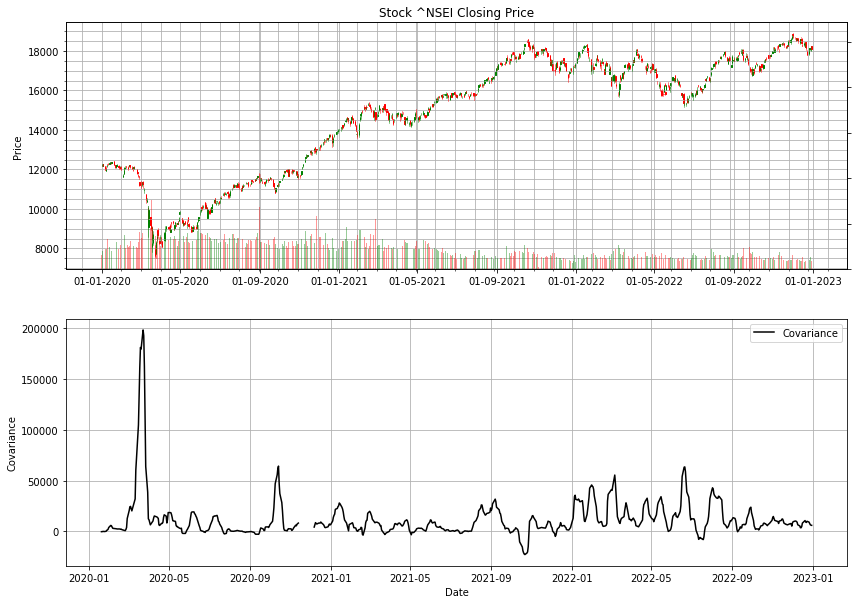

In [15]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df1.Volume.max())
ax1.set_title('Stock '+ symbol1 +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Cov'], label='Covariance', color='black')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Covariance')
ax2.set_xlabel('Date')